In [1]:
import pandas as pd
import numpy as np

In [2]:
df_all = pd.read_csv("D:\\datapool\\cs-training.csv")

df_all["test_cat1"] = pd.Series(np.random.randint(0,5,size=150000)).apply(lambda x:str(x)+"_test")
df_all["test_cat2"] = pd.Series(np.random.randint(0,10,size=150000)).apply(lambda x:str(x)+"_test")
df_all["test_cat3"] = pd.Series(np.random.randint(0,20,size=150000)).apply(lambda x:str(x)+"_test")
df_all["test_U"] = df_all["SeriousDlqin2yrs"]
df_all.loc[df_all["test_cat1"] == "0_test","test_cat1"] = np.nan
df_all.loc[df_all["test_cat2"] == "0_test","test_cat2"] = np.nan
df_all.loc[df_all["test_cat3"] == "0_test","test_cat3"] = np.nan


df_train = df_all.sample(frac = 0.7)
df_test = df_all[df_all.index.isin(df_train.index) == False]

x = df_train.drop([u'Unnamed: 0', u'SeriousDlqin2yrs'] , axis = 1)
y_column = u'SeriousDlqin2yrs'
y = df_train[u'SeriousDlqin2yrs']

x_test = df_test.drop([u'Unnamed: 0', u'SeriousDlqin2yrs'] , axis = 1)
#y_column = u'SeriousDlqin2yrs'
y_test = df_test[u'SeriousDlqin2yrs']


In [143]:
%run D:\gitstore\fy_scorecard.py

ximu = fs_scorecard(x,y,event = 1,workpath = "./")

#ximu.get_woe_iv()

ximu.columns_bin_dict["NumberOfTime30-59DaysPastDueNotWorse"] = [-np.inf,0,np.inf]
ximu.columns_bin_dict["NumberOfTime60-89DaysPastDueNotWorse"] = [-np.inf,0,np.inf]
ximu.columns_bin_dict["NumberOfTimes90DaysLate"] = [-np.inf,0,np.inf]

ximu.get_woe_iv()

#ximu.woe_t.head()

FY Scorecard ready!
test_cat3 : too many values for discrete variables.


<string>:84: RuntimeWarning: divide by zero encountered in log


./woe_t.xlsx  generated;
 <name>.woe_t, <name>.iv_t available


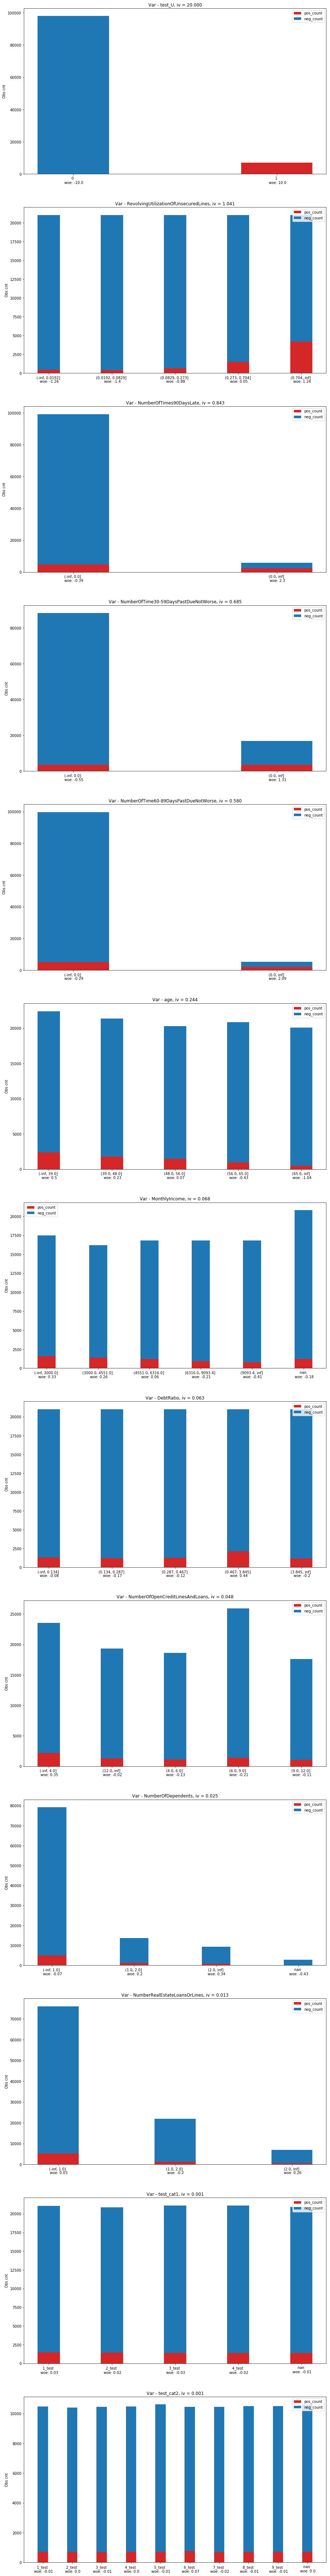

In [144]:
ximu.gen_woe_iv_plot()

In [63]:
ximu.get_woe_replaced_df()

<name>.df_woe_replaced, <name>.df_binned available


In [64]:
excluded_columns = ["test_U","NumberOfDependents","test_cat1","test_cat2","NumberRealEstateLoansOrLines"]
ximu.gen_model(excluded_columns = excluded_columns)

Optimization terminated successfully.
         Current function value: 0.449628
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               105000
Model:                          Logit   Df Residuals:                   104992
Method:                           MLE   Df Model:                            7
Date:                Tue, 19 Sep 2017   Pseudo R-squ.:                 -0.8188
Time:                        10:19:44   Log-Likelihood:                -47211.
converged:                       True   LL-Null:                       -25957.
                                        LLR p-value:                     1.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
DebtRatio                                0.4872      0.0

In [65]:
#需要变形
df_binned_test,df_woe_replaced_test = ximu.get_woe_replaced_df(x_test)

In [66]:
ximu.gen_score()

base_odds:  0.0724243940802
reverse_base_odds:  13.8075024679
base_rt:  20
base_score:  600
p:  28.8539008178
q:  524.252390397
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTime30-59DaysPastDueNotWorse
NumberOfTime60-89DaysPastDueNotWorse
NumberOfTimes90DaysLate
RevolvingUtilizationOfUnsecuredLines
age
count    45000.000000
mean       628.631040
std         48.364209
min        386.467692
25%        617.558481
50%        644.862211
75%        657.724343
max        672.060045
Name: final_score, dtype: float64
<name>.df_scored, <name>.woe_t_scored available


In [67]:
x_scored_test = ximu.gen_score(x_test)

base_odds:  0.0724243940802
reverse_base_odds:  13.8075024679
base_rt:  20
base_score:  600
p:  28.8539008178
q:  524.252390397
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTime30-59DaysPastDueNotWorse
NumberOfTime60-89DaysPastDueNotWorse
NumberOfTimes90DaysLate
RevolvingUtilizationOfUnsecuredLines
age
count    45000.000000
mean       628.631040
std         48.364209
min        386.467692
25%        617.558481
50%        644.862211
75%        657.724343
max        672.060045
Name: final_score, dtype: float64


ROC-(AUC = 0.85)
ROC_TEST-(AUC = 0.85)
ks_value:  0.556742673912
ks_position 5.0


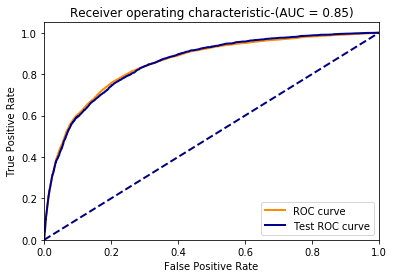

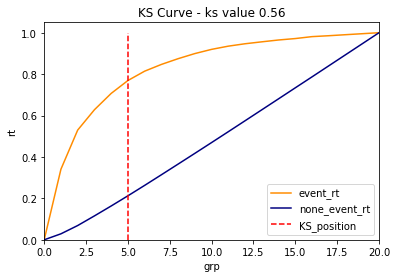

In [69]:
ximu.model_evaluate(x_test,y_test)

In [140]:
iv_t.sort_values(by = "iv" ,ascending=False)

,var_name,iv
10,test_U,20.000000
8,RevolvingUtilizationOfUnsecuredLines,1.041111
6,NumberOfTimes90DaysLate,0.842860
4,NumberOfTime30-59DaysPastDueNotWorse,0.685104
5,NumberOfTime60-89DaysPastDueNotWorse,0.579595
9,age,0.243759
1,MonthlyIncome,0.068037
0,DebtRatio,0.062636
3,NumberOfOpenCreditLinesAndLoans,0.047596
2,NumberOfDependents,0.025173


In [106]:
print plt.subplot.__doc__


    Return a subplot axes positioned by the given grid definition.

    Typical call signature::

      subplot(nrows, ncols, plot_number)

    Where *nrows* and *ncols* are used to notionally split the figure
    into ``nrows * ncols`` sub-axes, and *plot_number* is used to identify
    the particular subplot that this function is to create within the notional
    grid. *plot_number* starts at 1, increments across rows first and has a
    maximum of ``nrows * ncols``.

    In the case when *nrows*, *ncols* and *plot_number* are all less than 10,
    a convenience exists, such that the a 3 digit number can be given instead,
    where the hundreds represent *nrows*, the tens represent *ncols* and the
    units represent *plot_number*. For instance::

      subplot(211)

    produces a subaxes in a figure which represents the top plot (i.e. the
    first) in a 2 row by 1 column notional grid (no grid actually exists,
    but conceptually this is how the returned subplot has been positio

In [183]:
#排序性（提升图示例）
import math as mt
df_scored["score_rank"] = (df_scored["final_score"].rank(pct=True,ascending = False)*10).apply(mt.ceil)
df_test = pd.concat([df_scored["score_rank"],y,df_scored["final_score"]],axis = 1)
df_test_grp = df_test.groupby("score_rank")[y.name].agg([pd.Series.sum,pd.Series.count])
df_test_grp["pos_rt"] = df_test_grp["sum"] / df_test_grp["count"]
df_test_grp_2 = df_test.groupby("score_rank")["final_score"].agg([pd.Series.max,pd.Series.min])
df_test_grp_all = df_test_grp.merge(df_test_grp_2,left_index=True,right_index=True)
df_test_grp_all

,sum,count,pos_rt,max,min
score_rank,,,,,
1.0,59.0,10425.0,0.005659,672.899208,665.124496
2.0,62.0,10598.0,0.005850,665.120863,659.946885
3.0,112.0,10437.0,0.010731,659.937912,655.963984
4.0,128.0,10467.0,0.012229,655.945261,650.801206
5.0,181.0,10464.0,0.017297,650.782774,644.505749
6.0,312.0,10585.0,0.029476,644.491946,634.438530
7.0,440.0,10538.0,0.041754,634.437396,624.510209
8.0,751.0,10460.0,0.071797,624.501771,610.740691
9.0,1232.0,10543.0,0.116855,610.708590,581.075812


In [71]:
woe_t

NameError: name 'woe_t' is not defined